In [1]:
import pandas as pd
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from model import *
from collections import Counter


# Titanic Data

## Load Data And Preprocessing

In [2]:
path_csv = "data/titanic_modified_dataset.csv"
titanic_data_df = pd.read_csv(path_csv, index_col="PassengerId")
list_feature = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Title"]
titanic_data_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0


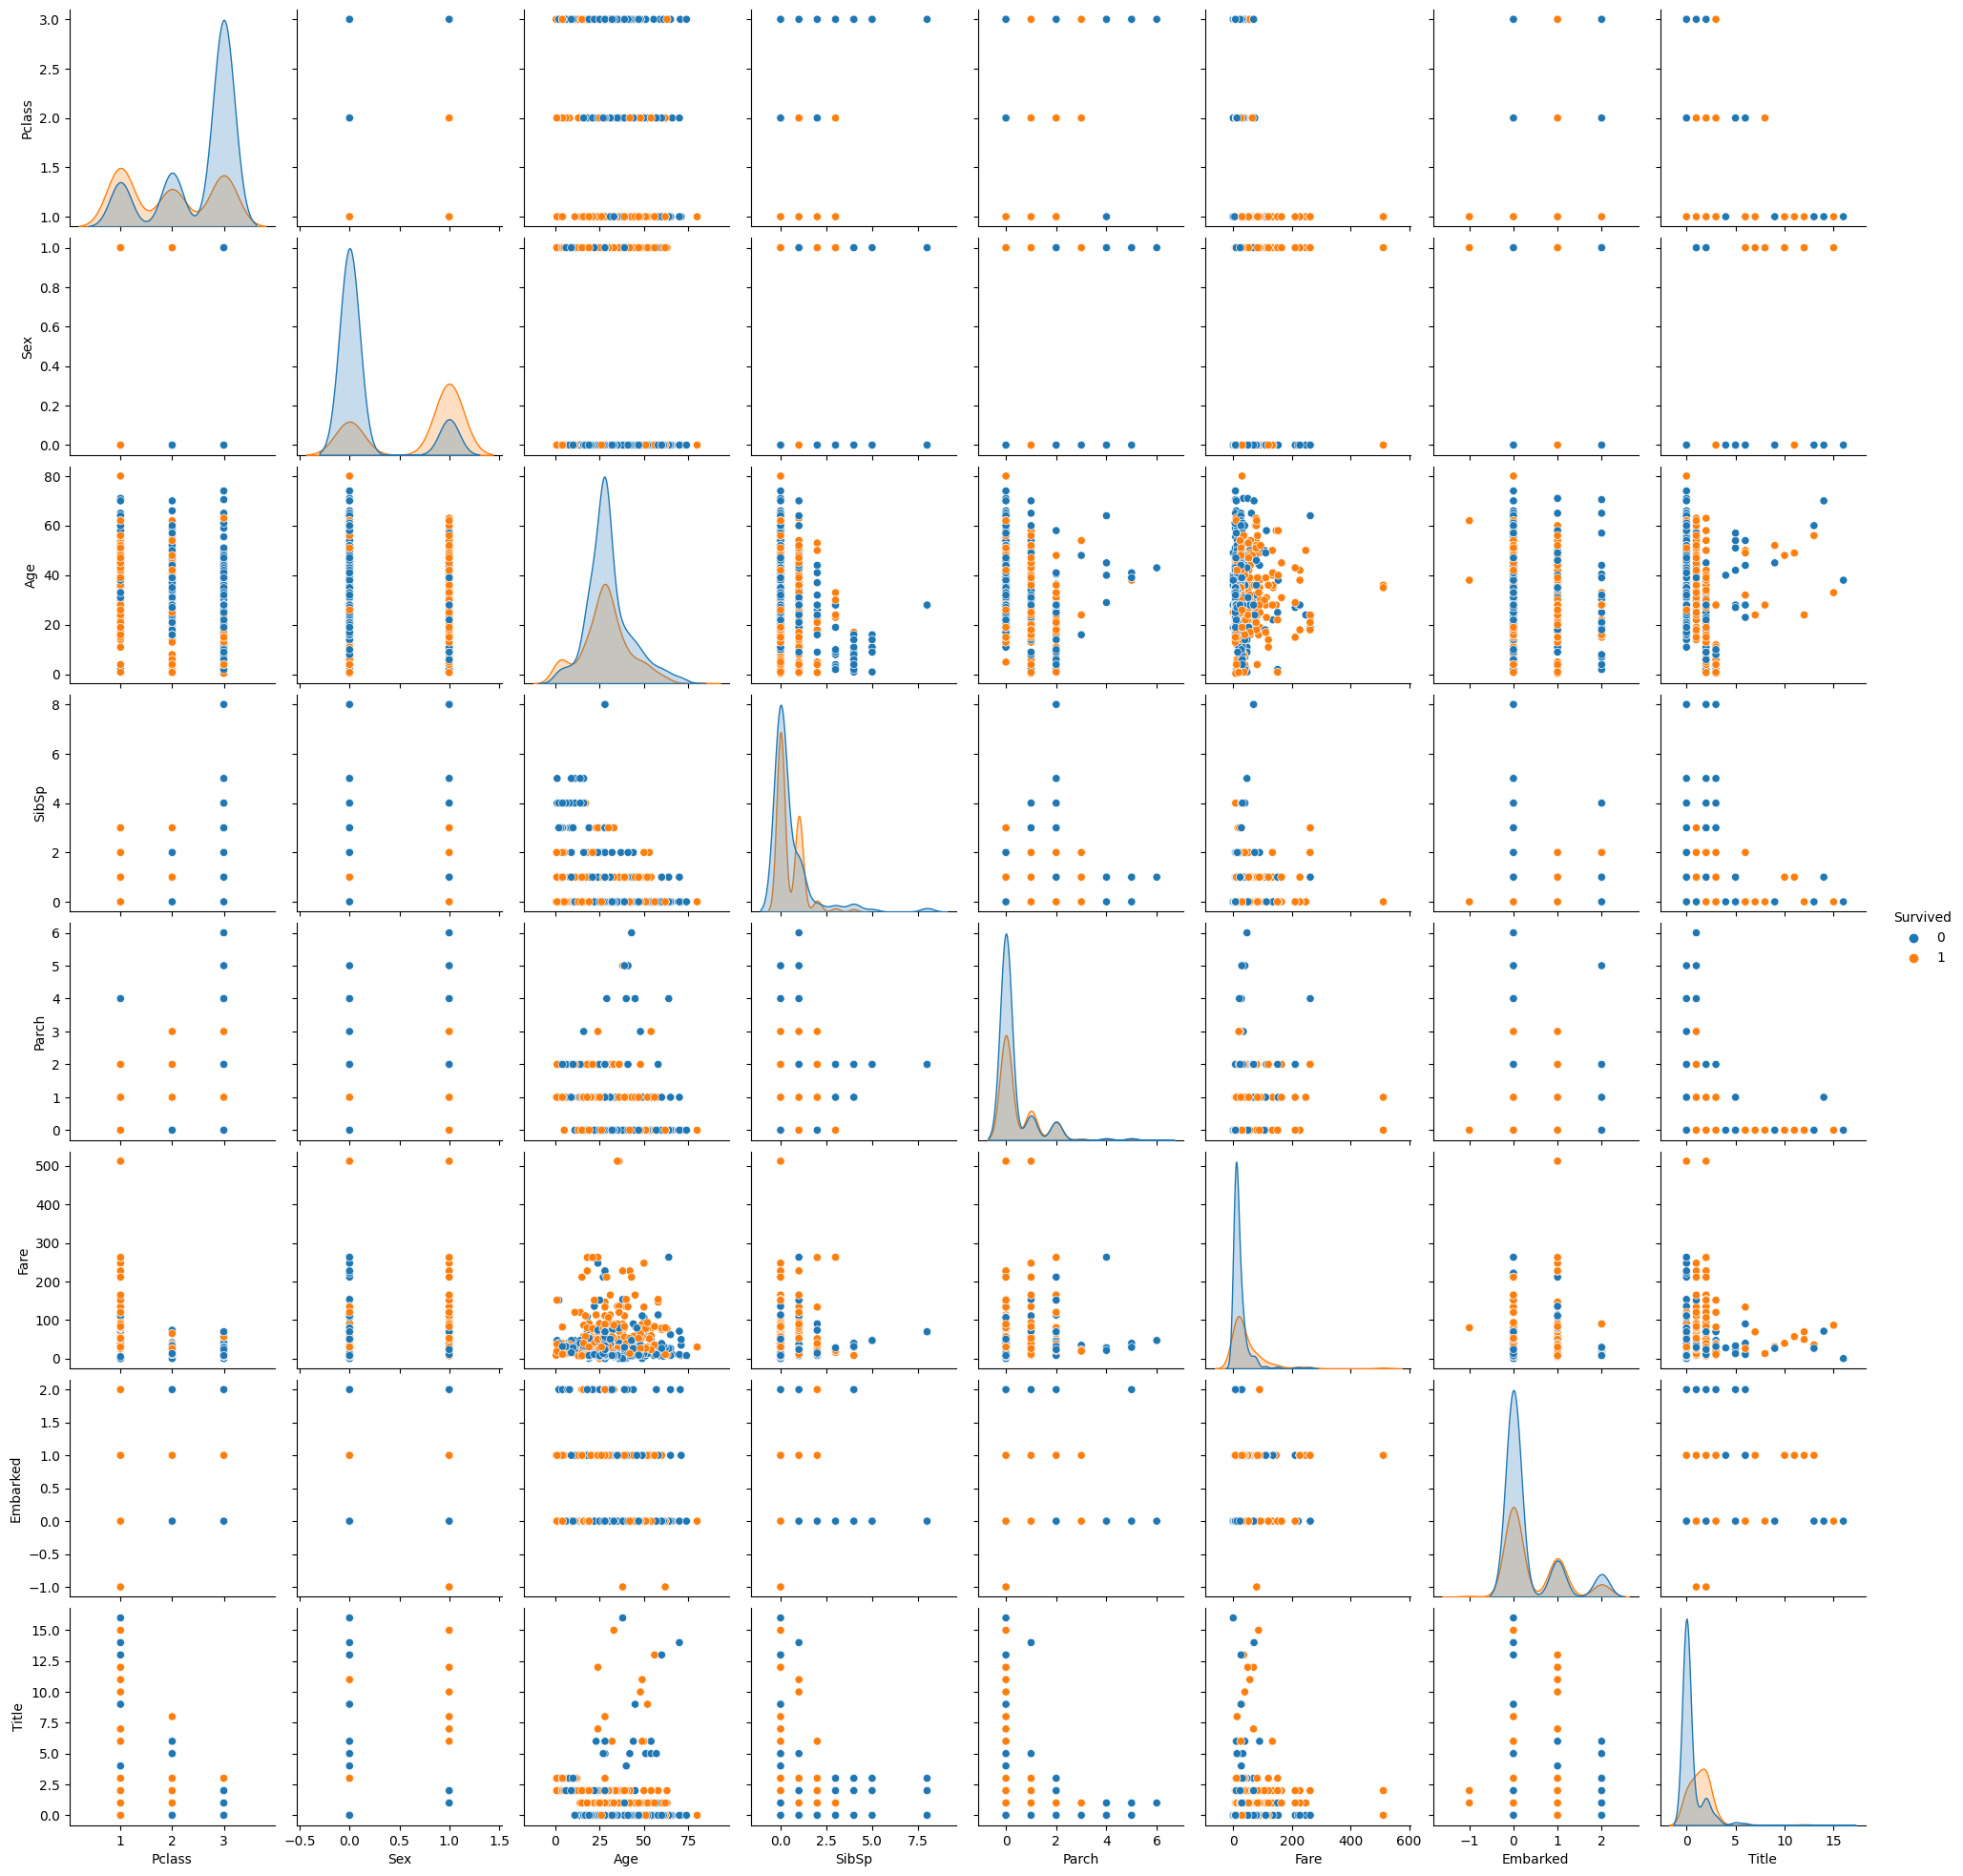

In [5]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=titanic_data_df, hue = 'Survived')

<AxesSubplot:>

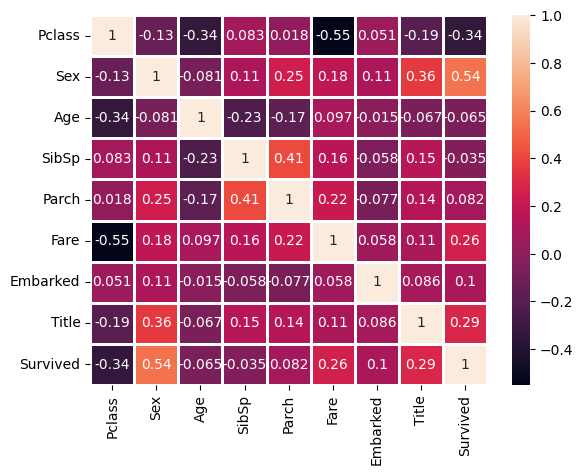

In [4]:
sns.heatmap(titanic_data_df.corr(), annot = True, linewidths = 1)

## Splitting to train

In [3]:
# convert titanic data to tensor
titanic_data_tensor = torch.tensor(titanic_data_df.values, dtype=torch.float32)

# devide features to X, label to y 
X, y = titanic_data_tensor[:, :-1], titanic_data_tensor[:, -1]


TRAIN_SIZE = 0.7
VAL_SIZE = 0.2
#TEST_SIZE = 0.1
TRAIN_SAMPLES = int(TRAIN_SIZE * titanic_data_tensor.shape[0])
VAL_SAMPLES = TRAIN_SAMPLES + int(VAL_SIZE * titanic_data_tensor.shape[0])

X_train, y_train = X[:TRAIN_SAMPLES], y[:TRAIN_SAMPLES]
X_val, y_val = X[TRAIN_SAMPLES:VAL_SAMPLES], y[TRAIN_SAMPLES:VAL_SAMPLES]
X_test, y_test = X[VAL_SAMPLES:], y[VAL_SAMPLES:]

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

torch.Size([623, 8]) torch.Size([178, 8]) torch.Size([90, 8])
torch.Size([623]) torch.Size([178]) torch.Size([90])


## KNN model

In [21]:
KNN_Model = KNN(X_train=X_train, y_train=y_train, k=7)
test_position = 0
predict = KNN_Model.fit_predict(X_test[test_position])
print(f"label_predict: {predict}, label_test: {y_test[test_position]}")

label_predict: 1.0, label_test: 1.0


In [36]:
eval = KNN_Model.evaluate(X_val, y_val)
print(f"Accuracy to predict validation set: {eval * 100}%")

Accuracy to predict validation set: 65.73033707865169%


In [8]:
y_test_pred = []
for item in X_test:
      predict = KNN_Model.fit_predict(item)
      y_test_pred.append(predict)
y_test_pred = torch.tensor(y_test_pred)

<AxesSubplot:>

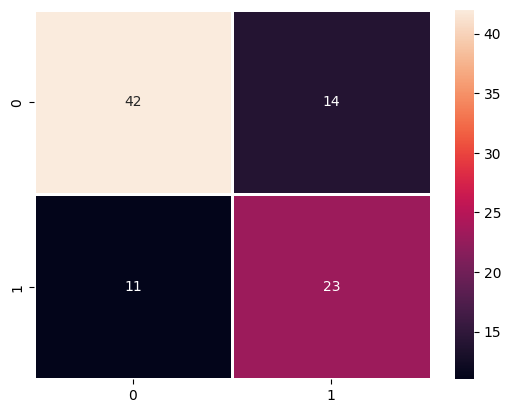

In [9]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, linewidths = 1)

In [10]:
print(
    f"Classification report for classifier KNN:\n"
    f"{classification_report(y_test, y_test_pred)}\n"
)

Classification report for classifier KNN:
              precision    recall  f1-score   support

         0.0       0.79      0.75      0.77        56
         1.0       0.62      0.68      0.65        34

    accuracy                           0.72        90
   macro avg       0.71      0.71      0.71        90
weighted avg       0.73      0.72      0.72        90




## Logistic Regression Model

In [11]:
# add bias to X_train, X_val, X_test
X_train_LR = torch.cat((X_train, torch.ones(X_train.shape[0], 1)), dim=1)
X_val_LR = torch.cat((X_val, torch.ones(X_val.shape[0], 1)), dim=1)
X_test_LR = torch.cat((X_test, torch.ones(X_test.shape[0], 1)), dim=1)

In [18]:
batch_size = 32
learning_rate = 0.001
n_features = X_train_LR.shape[1]
n_iters = 900
LRModel = LogisticRegression(batch_size, n_features, type="binary")
history = LRModel.fit(X_train_LR, y_train, X_val_LR, y_val, n_iters, learning_rate)

  0%|          | 0/900 [00:00<?, ?it/s]

Epoch: 10, loss: 0.824024498462677, acc: 0.6163724064826965, loss_val: 0.891510546207428, acc_val: 0.6235954761505127
Epoch: 20, loss: 0.7945323586463928, acc: 0.6308186054229736, loss_val: 0.8534389138221741, acc_val: 0.6573033928871155
Epoch: 30, loss: 0.7662851810455322, acc: 0.6404494643211365, loss_val: 0.8179094791412354, acc_val: 0.6685393452644348
Epoch: 40, loss: 0.7394087910652161, acc: 0.6597110629081726, loss_val: 0.7849653363227844, acc_val: 0.6797752976417542
Epoch: 50, loss: 0.71403568983078, acc: 0.6645264625549316, loss_val: 0.7546285390853882, acc_val: 0.6685393452644348
Epoch: 60, loss: 0.6902927160263062, acc: 0.6629213690757751, loss_val: 0.7268955111503601, acc_val: 0.6853932738304138
Epoch: 70, loss: 0.6682904958724976, acc: 0.6709470152854919, loss_val: 0.7017393112182617, acc_val: 0.6853932738304138
Epoch: 80, loss: 0.6481095552444458, acc: 0.6709470152854919, loss_val: 0.6791063547134399, acc_val: 0.6910112500190735
Epoch: 90, loss: 0.6297901272773743, acc: 0.

In [25]:
y_test_pred_LR = torch.round(LRModel.predict(X_test_LR))

<AxesSubplot:>

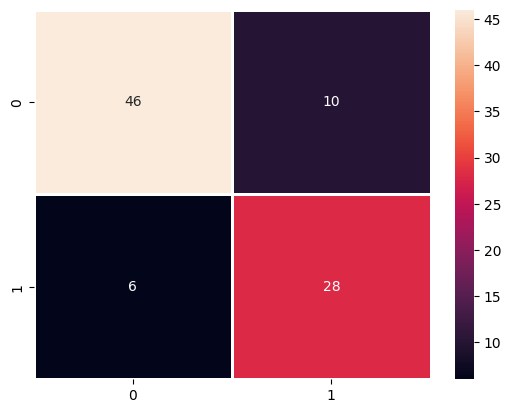

In [27]:
sns.heatmap(confusion_matrix(y_test, y_test_pred_LR), annot = True, linewidths = 1)

In [38]:
print(
    f"Classification report for classifier Logistic Regression:\n"
    f"{classification_report(y_test, y_test_pred_LR)}\n"
)

Classification report for classifier Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85        56
         1.0       0.74      0.82      0.78        34

    accuracy                           0.82        90
   macro avg       0.81      0.82      0.81        90
weighted avg       0.83      0.82      0.82        90




## Decision Tree Model

In [65]:
DecisionTreeModel = DecisionTree(min_sample= 5, max_depth= 10, impurity_function= "gini")
DecisionTreeModel.fit(X_train, y_train)

c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:373: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X)
c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:374: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y)


In [66]:
DecisionTreeModel.print_tree(DecisionTreeModel.root, list_feature=list_feature)

                              ┌1.0
                   ┌SibSp, 2.0┤
                   |          |                 ┌0.0
                   |          |        ┌Age, 2.0┤
                   |          |        |        └1.0
                   |          └Age, 3.0┤
                   |                   └0.0
         ┌Age, 12.0┤
         |         |                                            ┌0.0
         |         |                                 ┌Fare, 26.0┤
         |         |                                 |          |          ┌1.0
         |         |                                 |          └Title, 0.0┤
         |         |                                 |                     └0.0
         |         |                     ┌Fare, 26.55┤
         |         |                     |           |                                          ┌0.0
         |         |                     |           |                               ┌Fare, 29.7┤
         |         |                     |   

In [67]:
y_val_pred_DT = DecisionTreeModel.predict(X_val)
print(f"Accuracy to predict validation set: {accuracy_score(y_val, y_val_pred_DT) * 100}%")

Accuracy to predict validation set: 62.35955056179775%


In [68]:
y_test_pred_DT = DecisionTreeModel.predict(X_test)

<AxesSubplot:>

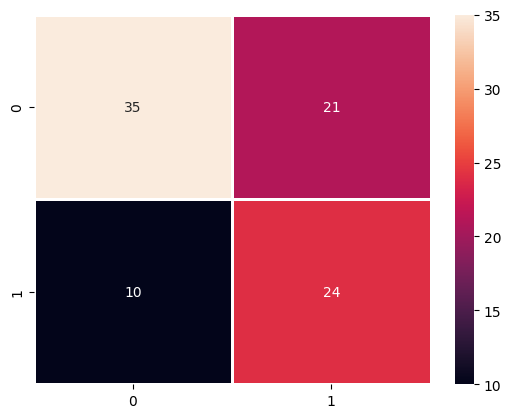

In [69]:
sns.heatmap(confusion_matrix(y_test, y_test_pred_DT), annot = True, linewidths = 1)

In [70]:
print(
    f"Classification report for classifier Decision Tree:\n"
    f"{classification_report(y_test, y_test_pred_DT)}\n"
)

Classification report for classifier Decision Tree:
              precision    recall  f1-score   support

         0.0       0.78      0.62      0.69        56
         1.0       0.53      0.71      0.61        34

    accuracy                           0.66        90
   macro avg       0.66      0.67      0.65        90
weighted avg       0.69      0.66      0.66        90




## Random Forest Model

In [103]:
RandomForestModel = RandomForest(n_trees=10, min_sample=2, max_depth=10, impurity_function="gini")
RandomForestModel.fit(X_train, y_train)

c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:373: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X)
c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:374: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y)


In [108]:
RandomForestModel.forest[0].print_tree(RandomForestModel.forest[0].root, list_feature=titanic_data_df.columns[:-1])

                              ┌1.0
                  ┌Pclass, 2.0┤
                  |           |        ┌0.0
                  |           └Age, 2.0┤
                  |                    |        ┌1.0
                  |                    └Age, 3.0┤
                  |                             └0.0
         ┌Age, 8.0┤
         |        |                                        ┌1.0
         |        |                               ┌Age, 9.0┤
         |        |                               |        |                   ┌0.0
         |        |                               |        |         ┌Age, 17.0┤
         |        |                               |        |         |         |                    ┌0.0
         |        |                               |        |         |         |          ┌Fare, 7.9┤
         |        |                               |        |         |         |          |         |         ┌1.0
         |        |                               |        |

In [104]:
y_val_pred_RF = RandomForestModel.predict(X_val)
print(f"Accuracy to predict validation set: {accuracy_score(y_val, y_val_pred_RF) * 100}%")

Accuracy to predict validation set: 70.2247191011236%


In [105]:
y_test_pred_RF = RandomForestModel.predict(X_test)

<AxesSubplot:>

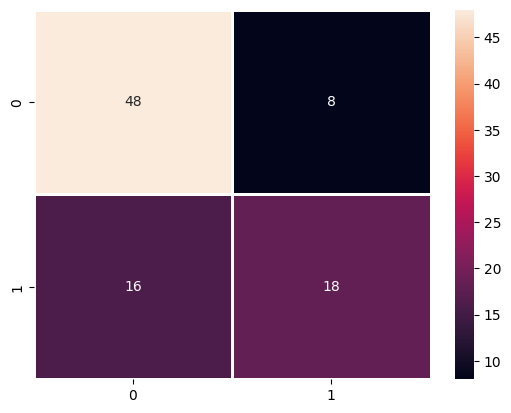

In [106]:
sns.heatmap(confusion_matrix(y_test, y_test_pred_RF), annot = True, linewidths = 1)

In [107]:
print(
    f"Classification report for classifier Random Forest:\n"
    f"{classification_report(y_test, y_test_pred_RF)}\n"
)

Classification report for classifier Random Forest:
              precision    recall  f1-score   support

         0.0       0.75      0.86      0.80        56
         1.0       0.69      0.53      0.60        34

    accuracy                           0.73        90
   macro avg       0.72      0.69      0.70        90
weighted avg       0.73      0.73      0.72        90




## Ada Boost Model

In [86]:
AdaBoostModel = AdaBoost(X_train, y_train, num_stump=10)
AdaBoostModel.fit()

c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:373: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X)
c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:374: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y)
c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:519: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred = torch.tensor(stump.predict(self.X))


In [88]:
for i in range(10):
    AdaBoostModel.stump_list[i].print_tree(AdaBoostModel.stump_list[i].root, list_feature= titanic_data_df.columns[:-1])

         ┌0.0
 Sex, 0.0┤
         └1.0
           ┌0.0
 Title, 0.0┤
           └0.0
           ┌0.0
 Title, 0.0┤
           └1.0
           ┌1.0
 Title, 0.0┤
           └0.0
           ┌0.0
 Title, 0.0┤
           └1.0
           ┌0.0
 Title, 0.0┤
           └1.0
           ┌0.0
 Title, 0.0┤
           └0.0
            ┌0.0
 Fare, 15.55┤
            └1.0
           ┌1.0
 SibSp, 2.0┤
           └0.0
           ┌1.0
 SibSp, 2.0┤
           └0.0


In [87]:
y_val_pred_Ada = AdaBoostModel.predict(X_val)
print(f"Accuracy to predict validation set: {accuracy_score(y_val, y_val_pred_Ada) * 100}%")

Accuracy to predict validation set: 65.73033707865169%


c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:542: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X)


In [89]:
y_test_pred_Ada = AdaBoostModel.predict(X_test)

c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:542: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X)


<AxesSubplot:>

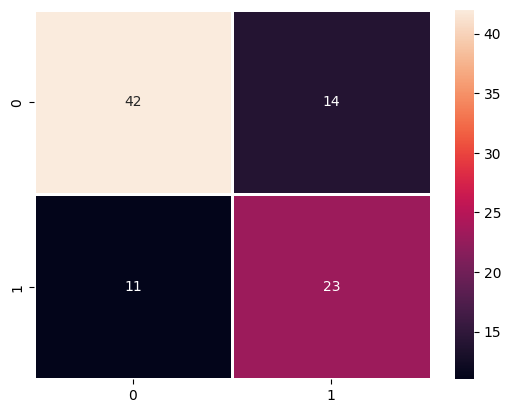

In [90]:
sns.heatmap(confusion_matrix(y_test, y_test_pred_Ada), annot = True, linewidths = 1)

In [91]:
print(
    f"Classification report for classifier AdaBoost:\n"
    f"{classification_report(y_test, y_test_pred_Ada)}\n"
)

Classification report for classifier AdaBoost:
              precision    recall  f1-score   support

         0.0       0.79      0.75      0.77        56
         1.0       0.62      0.68      0.65        34

    accuracy                           0.72        90
   macro avg       0.71      0.71      0.71        90
weighted avg       0.73      0.72      0.72        90




## XGBoost Model

In [131]:
XGBoostModel = XGBoost()
XGBoostModel.fit(X_train, y_train, learning_rate=0.01, max_depth=5, n_estimators=20, min_sample=2, gamma=0, lambda_=1)

c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:637: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X)
c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:638: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y)


In [ ]:
for i in range(2):
    XGBoostModel.trees[i].print_tree(XGBoostModel.trees[i].root, list_feature=titanic_data_df.columns[:-1])

In [132]:
y_val_pred_XG = XGBoostModel.predict(X_val)
print(f"Accuracy to predict validation set: {accuracy_score(y_val, y_val_pred_XG) * 100}%")

Accuracy to predict validation set: 69.10112359550563%


In [122]:
y_test_pred_XG = XGBoostModel.predict(X_test)

<AxesSubplot:>

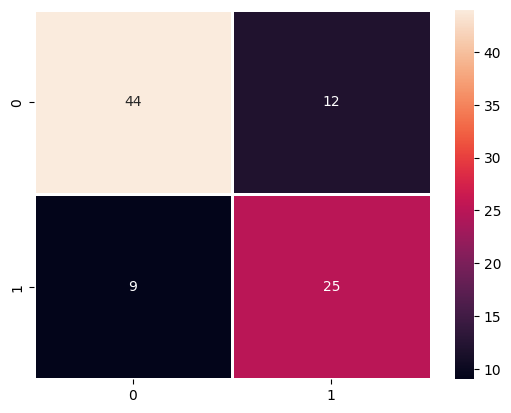

In [118]:
sns.heatmap(confusion_matrix(y_test, y_test_pred_XG), annot = True, linewidths = 1)

In [133]:
print(
    f"Classification report for classifier XGBoost:\n"
    f"{classification_report(y_test, y_test_pred_XG)}\n"
)

Classification report for classifier XGBoost:
              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80        56
         1.0       0.67      0.71      0.69        34

    accuracy                           0.76        90
   macro avg       0.74      0.75      0.74        90
weighted avg       0.76      0.76      0.76        90




## Naive Bayes Model

In [14]:
def train_test_split(x, y, test_size = 0.25, random_state = None):

	""" partioning the data into train and test sets """

	x_test = x.sample(frac = test_size, random_state = random_state)
	y_test = y[x_test.index]

	x_train = x.drop(x_test.index)
	y_train = y.drop(y_test.index)

	return x_train, x_test, y_train, y_test

In [15]:
def pre_processing(df):

	""" partioning data into features and target """

	X = df.drop([df.columns[-1]], axis = 1)
	y = df[df.columns[-1]]

	return X, y

In [16]:
X_Bayes, y_Bayes = pre_processing(titanic_data_df)
X_train_Bayes, X_test_Bayes, y_train_Bayes, y_test_Bayes = train_test_split(X_Bayes, y_Bayes, test_size=0.1, random_state=42)

In [17]:
BayesModel = NaiveBayesClassifier('Gaussian')
BayesModel.fit(X_train_Bayes, y_train_Bayes)

In [18]:
y_test_pred_Bayes = BayesModel.predict(X_test_Bayes)

<AxesSubplot:>

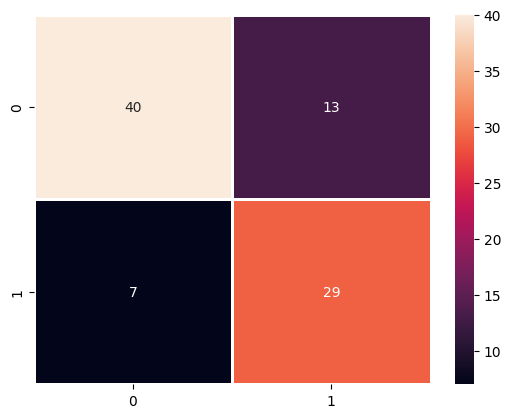

In [19]:
sns.heatmap(confusion_matrix(y_test_Bayes, y_test_pred_Bayes), annot = True, linewidths = 1)

In [20]:
print(
    f"Classification report for classifier Naive Bayes Classifier:\n"
    f"{classification_report(y_test_Bayes, y_test_pred_Bayes)}\n"
)

Classification report for classifier Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.85      0.75      0.80        53
           1       0.69      0.81      0.74        36

    accuracy                           0.78        89
   macro avg       0.77      0.78      0.77        89
weighted avg       0.79      0.78      0.78        89




## Genetic Algorithm

In [4]:
# add bias to X_train, X_val, X_test
X_train_GA = torch.cat((X_train, torch.ones(X_train.shape[0], 1)), dim=1)
X_val_GA = torch.cat((X_val, torch.ones(X_val.shape[0], 1)), dim=1)
X_test_GA = torch.cat((X_test, torch.ones(X_test.shape[0], 1)), dim=1)

In [5]:
def sigmoid(z):
    return 1 / (1 + torch.exp(-z))

def compute_loss_classification(individual, X, y):
    y_hat = sigmoid(X @ individual)
    y_hat = torch.clip(y_hat, 1e-7, 1 - 1e-7)
    return torch.mean( y * torch.log(y_hat) + (1 - y) * torch.log(1 - y_hat) )

In [13]:
GAModel = GeneticAlgorithm(X_train_GA, y_train, individual_size=X_train_GA.shape[1], population_size=700, fitness_function=compute_loss_classification, bounds=20, mutation_rate=0.1, crossover_rate=0.9, elitism=2)
history = GAModel.fit(1000)
best_population = GAModel.get_best_individual()
best_population

Generation:  10 Best fitness:  tensor([ 7.3436, -8.9010,  9.0819,  9.0741, -8.8545, -7.6092,  3.2412, -9.5029,
        -7.9973]) with fitness:  tensor(-0.0920)
Generation:  20 Best fitness:  tensor([ 7.3436, -8.9010,  9.0819,  3.1539,  3.6727, -7.6092,  9.1802, -9.5029,
        -7.9973]) with fitness:  tensor(-0.0918)
Generation:  30 Best fitness:  tensor([ 7.3436, -8.9010,  9.0819,  2.0105,  6.9107, -7.6092,  9.4223, -9.5029,
        -8.2885]) with fitness:  tensor(-0.0918)
Generation:  40 Best fitness:  tensor([ 7.3436, -9.4613,  9.0819,  2.0105,  6.9107, -7.6092,  9.4223, -9.5029,
        -8.2885]) with fitness:  tensor(-0.0918)
Generation:  50 Best fitness:  tensor([ 7.3436, -9.4613,  9.0819,  2.0105,  6.9107, -7.6092,  9.6016, -9.5029,
        -8.2885]) with fitness:  tensor(-0.0918)
Generation:  60 Best fitness:  tensor([ 7.3436, -9.4613,  9.0819,  2.0105,  6.9107, -7.6092,  9.6016, -9.5029,
        -8.2885]) with fitness:  tensor(-0.0918)
Generation:  70 Best fitness:  tensor([ 

tensor([ 7.3436, -8.9590,  9.0819,  1.9762,  8.5671, -7.6092,  9.9525, -9.9856,
        -7.9190])

In [14]:
y_val_pred_GA = sigmoid(X_val_GA @ best_population) > 0.5
print(f"Accuracy to predict validation set: {accuracy_score(y_val, y_val_pred_GA) * 100}%")

Accuracy to predict validation set: 26.40449438202247%


In [15]:
y_test_pred_GA = torch.round(sigmoid(X_test_GA @ best_population))

<AxesSubplot:>

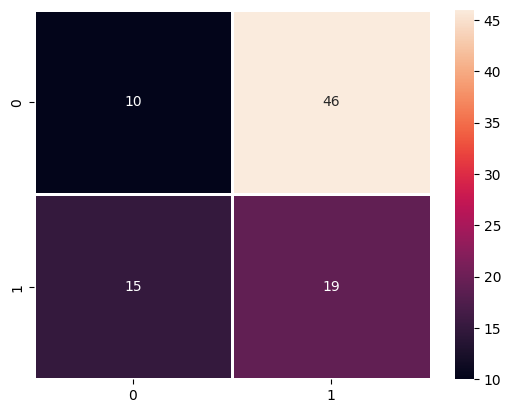

In [16]:
sns.heatmap(confusion_matrix(y_test, y_test_pred_GA), annot = True, linewidths = 1)

In [17]:
print(
    f"Classification report for classifier Genetic Algorithm:\n"
    f"{classification_report(y_test, y_test_pred_GA)}\n"
)

Classification report for classifier Genetic Algorithm:
              precision    recall  f1-score   support

         0.0       0.40      0.18      0.25        56
         1.0       0.29      0.56      0.38        34

    accuracy                           0.32        90
   macro avg       0.35      0.37      0.32        90
weighted avg       0.36      0.32      0.30        90




## Ensemble Learning

In [7]:
KNN_Model = KNN(X_train=X_train, y_train=y_train, k=7)

In [8]:
XGBoostModel = XGBoost()
XGBoostModel.fit(X_train, y_train, learning_rate=0.01, max_depth=5, n_estimators=20, min_sample=2, gamma=0, lambda_=1)

c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:637: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X)
c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:638: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y)


In [12]:
# add bias to X_train, X_val, X_test
X_train_LR = torch.cat((X_train, torch.ones(X_train.shape[0], 1)), dim=1)
X_val_LR = torch.cat((X_val, torch.ones(X_val.shape[0], 1)), dim=1)
X_test_LR = torch.cat((X_test, torch.ones(X_test.shape[0], 1)), dim=1)

batch_size = 32
learning_rate = 0.001
n_features = X_train_LR.shape[1]
n_iters = 900
LRModel = LogisticRegression(batch_size, n_features, type="binary")
history = LRModel.fit(X_train_LR, y_train, X_val_LR, y_val, n_iters, learning_rate)

  0%|          | 0/900 [00:00<?, ?it/s]

Epoch: 10, loss: 0.6233433485031128, acc: 0.6950240731239319, loss_val: 0.7981188297271729, acc_val: 0.7247191071510315
Epoch: 20, loss: 0.6035125851631165, acc: 0.7062600255012512, loss_val: 0.7663708925247192, acc_val: 0.7247191071510315
Epoch: 30, loss: 0.5851127505302429, acc: 0.7094703316688538, loss_val: 0.736419141292572, acc_val: 0.7359550595283508
Epoch: 40, loss: 0.5681940913200378, acc: 0.7207062840461731, loss_val: 0.7083527445793152, acc_val: 0.7471910119056702
Epoch: 50, loss: 0.5527995824813843, acc: 0.7239165306091309, loss_val: 0.6822603344917297, acc_val: 0.7640449404716492
Epoch: 60, loss: 0.5389587879180908, acc: 0.7255216836929321, loss_val: 0.6582211852073669, acc_val: 0.7640449404716492
Epoch: 70, loss: 0.5266789793968201, acc: 0.7319422364234924, loss_val: 0.6362965703010559, acc_val: 0.7640449404716492
Epoch: 80, loss: 0.5159380435943604, acc: 0.7367576360702515, loss_val: 0.6165187954902649, acc_val: 0.7640449404716492
Epoch: 90, loss: 0.5066801905632019, acc:

In [21]:
RandomForestModel = RandomForest(n_trees=10, min_sample=2, max_depth=10, impurity_function="gini")
RandomForestModel.fit(X_train, y_train)

c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:373: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X)
c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:374: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y)


In [23]:
y_test_pred_KNN = []
for item in X_test:
      predict = KNN_Model.fit_predict(item)
      y_test_pred_KNN.append(predict)
y_test_pred_KNN = torch.tensor(y_test_pred_KNN)

y_test_pred_XG = XGBoostModel.predict(X_test)
y_test_pred_LR = torch.round(LRModel.predict(X_test_LR))
y_test_pred_RF = RandomForestModel.predict(X_test)

c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  point1 = torch.tensor(point1, dtype=torch.float32).reshape((1, len(point2[0])))
c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  point2 = torch.tensor(point2, dtype=torch.float32)


In [47]:
y_pred = []
for i in range(len(y_test_pred_KNN)):
    y_Counter = Counter([y_test_pred_KNN[i].item(), y_test_pred_XG[i].item(), y_test_pred_LR[i].item(), y_test_pred_RF[i].item()])
    y_pred.append(y_Counter.most_common(1)[0][0])

In [48]:
print(f"Accuracy to predict test set with KNN: {accuracy_score(y_test, y_test_pred_KNN) * 100}%")
print(f"Accuracy to predict test set with XGBoost: {accuracy_score(y_test, y_test_pred_XG) * 100}%")
print(f"Accuracy to predict test set with Logistic Regression: {accuracy_score(y_test, y_test_pred_LR) * 100}%")
print(f"Accuracy to predict test set with Random Forest: {accuracy_score(y_test, y_test_pred_RF) * 100}%")
print(f"Accuracy to predict test set with Ensemble Learning: {accuracy_score(y_test, y_pred) * 100}%")

Accuracy to predict test set with KNN: 72.22222222222221%
Accuracy to predict test set with XGBoost: 76.66666666666667%
Accuracy to predict test set with Logistic Regression: 80.0%
Accuracy to predict test set with Random Forest: 77.77777777777779%
Accuracy to predict test set with Ensemble Learning: 78.88888888888889%


<AxesSubplot:>

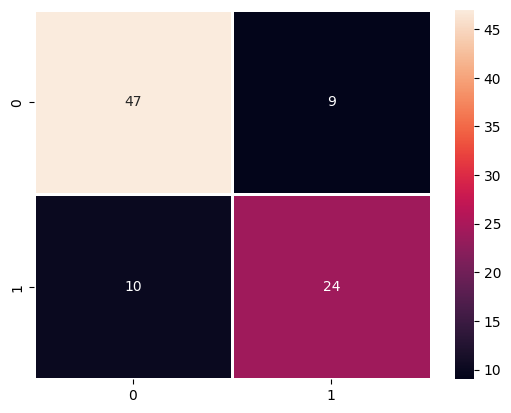

In [49]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, linewidths = 1)

In [50]:
print(
    f"Classification report for classifier XGBoost:\n"
    f"{classification_report(y_test, y_pred)}\n"
)

Classification report for classifier XGBoost:
              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83        56
         1.0       0.73      0.71      0.72        34

    accuracy                           0.79        90
   macro avg       0.78      0.77      0.77        90
weighted avg       0.79      0.79      0.79        90




# SpamBase Data

## Load Data And Preprocessing

In [2]:
spambase_data_df = pd.read_csv("data/spambase.data", header=None)
spambase_data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


<AxesSubplot:>

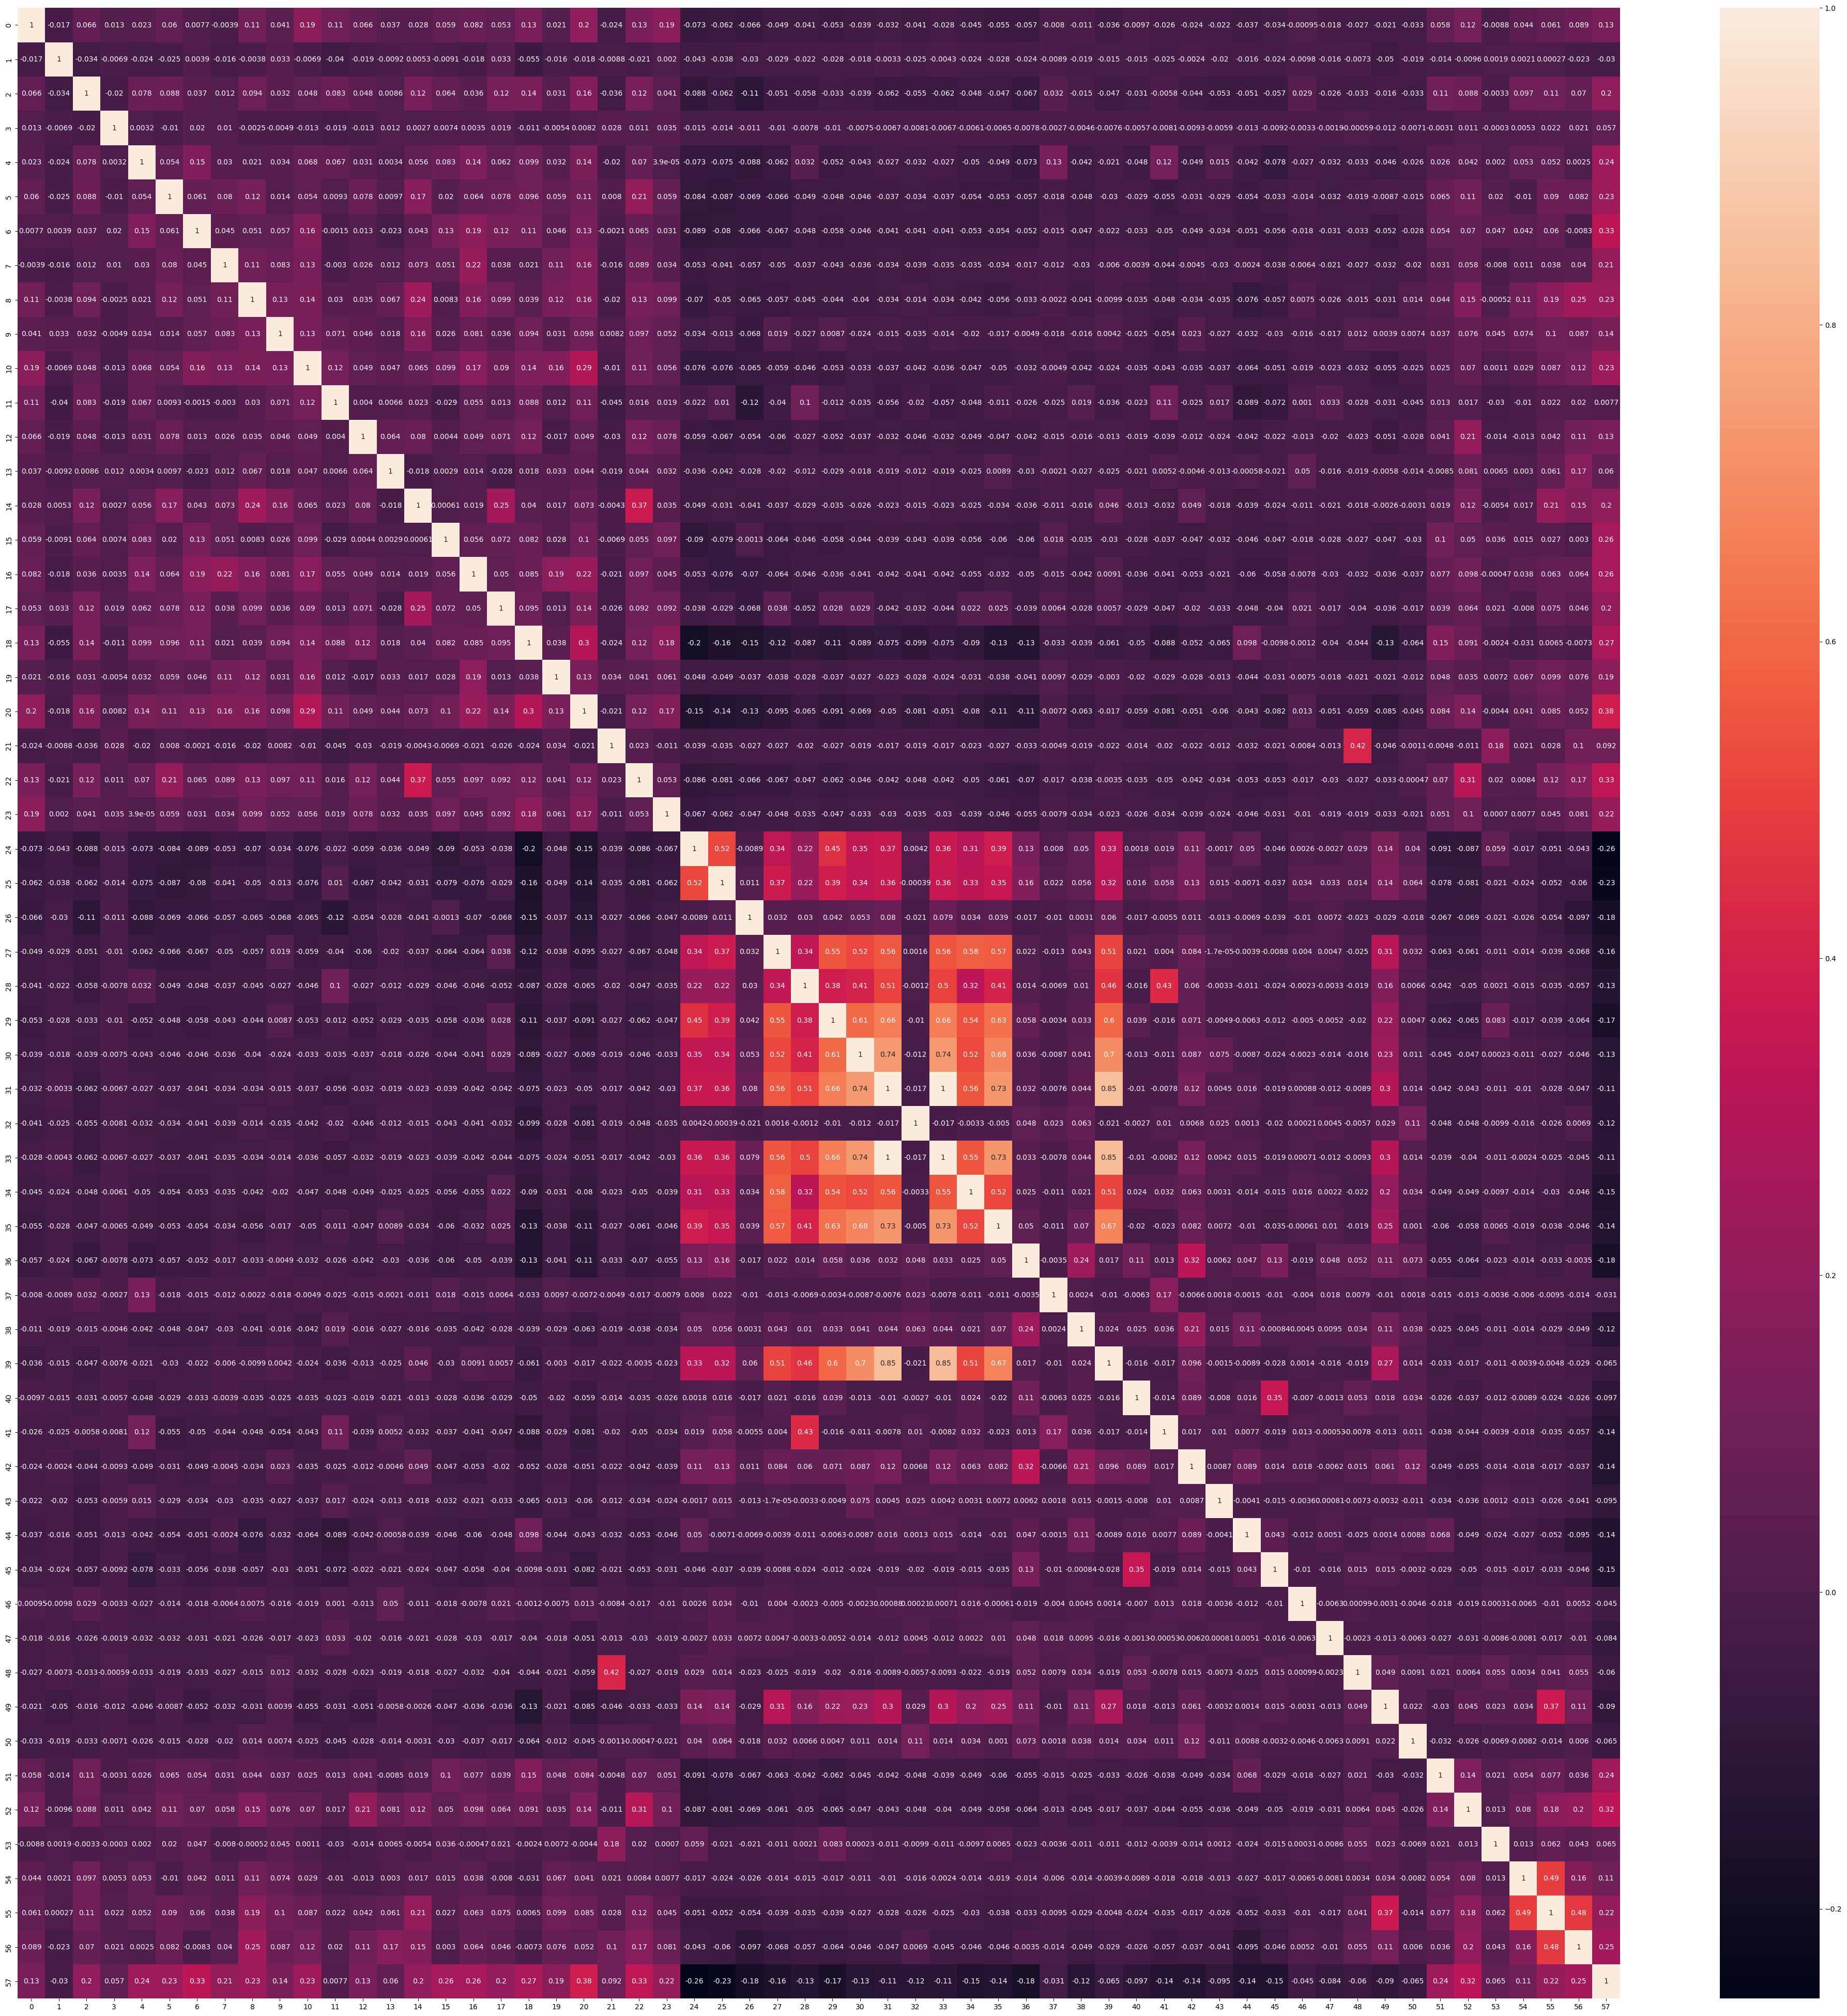

In [11]:
fig, ax = plt.subplots(figsize=(50, 50))
sns.heatmap(spambase_data_df.corr(), annot = True, linewidths = 0, ax=ax)

In [3]:
# remove some columns: 24, 29, 30, 31, 34, 48, 55 because they have high correlation with other columns
spambase_data_df.drop([24, 29, 30, 31, 34, 48, 55], axis=1, inplace=True)

## Splitting to train

In [4]:
# convert titanic data to tensor
spambase_data_tensor = torch.tensor(spambase_data_df.values, dtype=torch.float32)

# devide features to X, label to y 
X, y = spambase_data_tensor[:, :-1], spambase_data_tensor[:, -1]

# shuffle data
torch.manual_seed(42)
shuffle_index = torch.randperm(X.shape[0])
X, y = X[shuffle_index], y[shuffle_index]

TRAIN_SIZE = 0.7
VAL_SIZE = 0.2
#TEST_SIZE = 0.1
TRAIN_SAMPLES = int(TRAIN_SIZE * spambase_data_tensor.shape[0])
VAL_SAMPLES = TRAIN_SAMPLES + int(VAL_SIZE * spambase_data_tensor.shape[0])

X_train, y_train = X[:TRAIN_SAMPLES], y[:TRAIN_SAMPLES]
X_val, y_val = X[TRAIN_SAMPLES:VAL_SAMPLES], y[TRAIN_SAMPLES:VAL_SAMPLES]
X_test, y_test = X[VAL_SAMPLES:], y[VAL_SAMPLES:]

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

torch.Size([3220, 50]) torch.Size([920, 50]) torch.Size([461, 50])
torch.Size([3220]) torch.Size([920]) torch.Size([461])


## KNN model

In [18]:
KNN_Model = KNN(X_train=X_train, y_train=y_train, k=5)
test_position = 0
predict = KNN_Model.fit_predict(X_test[test_position])
print(f"label_predict: {predict}, label_test: {y_test[test_position]}")

label_predict: 1.0, label_test: 1.0


c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  point1 = torch.tensor(point1, dtype=torch.float32).reshape((1, len(point2[0])))
c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  point2 = torch.tensor(point2, dtype=torch.float32)


In [20]:
y_val_pred_KNN = KNN_Model.evaluate(X_val, y_val)
print(f"Accuracy to predict validation set: {y_val_pred_KNN * 100}%")

Accuracy to predict validation set: 84.56521739130434%


In [21]:
y_test_pred_KNN = []
for item in X_test:
      predict = KNN_Model.fit_predict(item)
      y_test_pred_KNN.append(predict)
y_test_pred_KNN = torch.tensor(y_test_pred_KNN)

<AxesSubplot:>

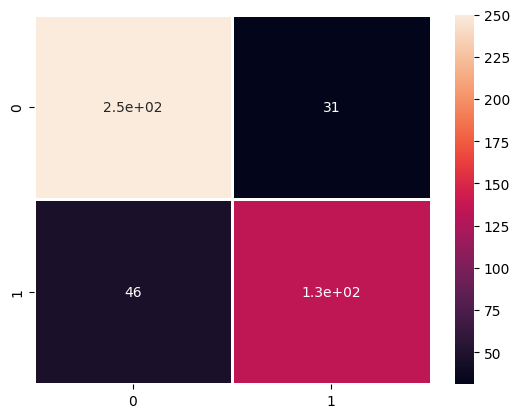

In [22]:
sns.heatmap(confusion_matrix(y_test, y_test_pred_KNN), annot = True, linewidths = 1)

In [23]:
print(
    f"Classification report for classifier KNN:\n"
    f"{classification_report(y_test, y_test_pred_KNN)}\n"
)

Classification report for classifier KNN:
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87       281
         1.0       0.81      0.74      0.78       180

    accuracy                           0.83       461
   macro avg       0.83      0.82      0.82       461
weighted avg       0.83      0.83      0.83       461




## Logistic Regression Model

In [24]:
# add bias to X_train, X_val, X_test
X_train_LR = torch.cat((X_train, torch.ones(X_train.shape[0], 1)), dim=1)
X_val_LR = torch.cat((X_val, torch.ones(X_val.shape[0], 1)), dim=1)
X_test_LR = torch.cat((X_test, torch.ones(X_test.shape[0], 1)), dim=1)

In [33]:
batch_size = 32
learning_rate = 0.001
n_features = X_train_LR.shape[1]
n_iters = 3000
LRModel = LogisticRegression(batch_size, n_features, type="binary")
history = LRModel.fit(X_train_LR, y_train, X_val_LR, y_val, n_iters, learning_rate)

  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 10, loss: 5.908052921295166, acc: 0.43602484464645386, loss_val: 2.9517385959625244, acc_val: 0.42500001192092896
Epoch: 20, loss: 5.860241889953613, acc: 0.49782609939575195, loss_val: 2.064588785171509, acc_val: 0.5032608509063721
Epoch: 30, loss: 4.570086479187012, acc: 0.45279502868652344, loss_val: 4.193336486816406, acc_val: 0.458695650100708
Epoch: 40, loss: 6.636258602142334, acc: 0.4316770136356354, loss_val: 6.577517509460449, acc_val: 0.43586957454681396
Epoch: 50, loss: 5.506684303283691, acc: 0.6397515535354614, loss_val: 1.7790899276733398, acc_val: 0.6402173638343811
Epoch: 60, loss: 4.218203067779541, acc: 0.5149068236351013, loss_val: 3.6905734539031982, acc_val: 0.541304349899292
Epoch: 70, loss: 6.585317134857178, acc: 0.44440993666648865, loss_val: 6.279644966125488, acc_val: 0.45108696818351746
Epoch: 80, loss: 6.570660591125488, acc: 0.4465838372707367, loss_val: 6.1955108642578125, acc_val: 0.45543476939201355
Epoch: 90, loss: 6.551957130432129, acc: 0.450

In [34]:
y_test_pred_LR = torch.round(LRModel.predict(X_test_LR))

<AxesSubplot:>

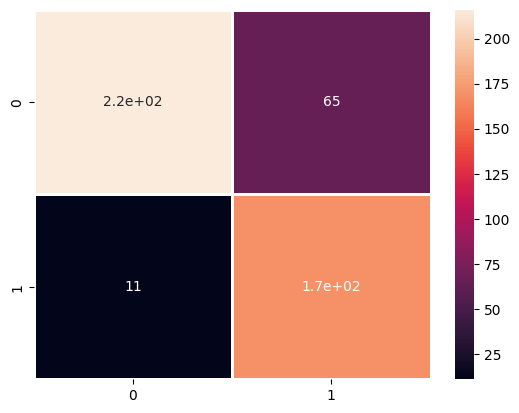

In [35]:
sns.heatmap(confusion_matrix(y_test, y_test_pred_LR), annot = True, linewidths = 1)

In [36]:
print(
    f"Classification report for classifier Logistic Regression:\n"
    f"{classification_report(y_test, y_test_pred_LR)}\n"
)

Classification report for classifier Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.95      0.77      0.85       281
         1.0       0.72      0.94      0.82       180

    accuracy                           0.84       461
   macro avg       0.84      0.85      0.83       461
weighted avg       0.86      0.84      0.84       461




## Decision Tree Model

In [37]:
DecisionTreeModel = DecisionTree(min_sample= 5, max_depth= 10, impurity_function= "gini")
DecisionTreeModel.fit(X_train, y_train)

c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:373: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X)
c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:374: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y)


In [42]:
list_feature = spambase_data_df.columns[:-1].tolist()
# convert to string
list_feature = [str(i) for i in list_feature]

In [43]:
DecisionTreeModel.print_tree(DecisionTreeModel.root, list_feature= list_feature)

                                                                                              ┌0.0
                                                                                      ┌7, 5.88┤
                                                                                      |       └1.0
                                                                             ┌54, 2.65┤
                                                                             |        |        ┌0.0
                                                                             |        └18, 5.55┤
                                                                             |                 └1.0
                                                                    ┌22, 0.97┤
                                                                    |        └0.0
                                                           ┌11, 5.88┤
                                                           |        └1.0
                 

In [44]:
y_val_pred_DT = DecisionTreeModel.predict(X_val)
print(f"Accuracy to predict validation set: {accuracy_score(y_val, y_val_pred_DT) * 100}%")

Accuracy to predict validation set: 80.54347826086956%


In [45]:
y_test_pred_DT = DecisionTreeModel.predict(X_test)

<AxesSubplot:>

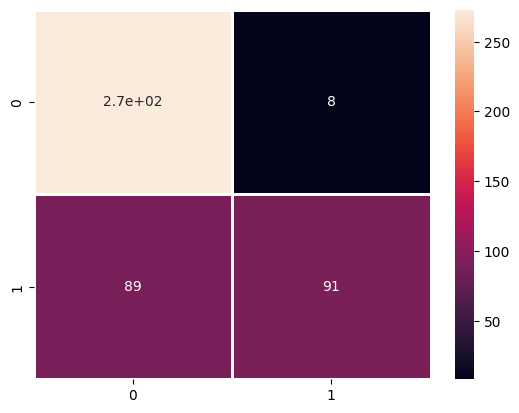

In [46]:
sns.heatmap(confusion_matrix(y_test, y_test_pred_DT), annot = True, linewidths = 1)

In [47]:
print(
    f"Classification report for classifier Decision Tree:\n"
    f"{classification_report(y_test, y_test_pred_DT)}\n"
)

Classification report for classifier Decision Tree:
              precision    recall  f1-score   support

         0.0       0.75      0.97      0.85       281
         1.0       0.92      0.51      0.65       180

    accuracy                           0.79       461
   macro avg       0.84      0.74      0.75       461
weighted avg       0.82      0.79      0.77       461




## Random Forest Model

In [48]:
RandomForestModel = RandomForest(n_trees=10, min_sample=2, max_depth=10, impurity_function="gini")
RandomForestModel.fit(X_train, y_train)

c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:373: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X)
c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:374: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y)


In [49]:
list_feature = spambase_data_df.columns[:-1].tolist()
# convert to string
list_feature = [str(i) for i in list_feature]

In [50]:
RandomForestModel.forest[0].print_tree(RandomForestModel.forest[0].root, list_feature=list_feature)

                                                                                            ┌0.0
                                                                                   ┌20, 1.45┤
                                                                                   |        └0.0
                                                                           ┌5, 0.78┤
                                                                           |       |        ┌0.0
                                                                           |       └54, 2.83┤
                                                                           |                └1.0
                                                                   ┌9, 3.33┤
                                                                   |       |       ┌1.0
                                                                   |       └9, 4.25┤
                                                                   |               └0.0
 

In [51]:
y_val_pred_RF = RandomForestModel.predict(X_val)
print(f"Accuracy to predict validation set: {accuracy_score(y_val, y_val_pred_RF) * 100}%")

Accuracy to predict validation set: 76.41304347826086%


In [52]:
y_test_pred_RF = RandomForestModel.predict(X_test)

<AxesSubplot:>

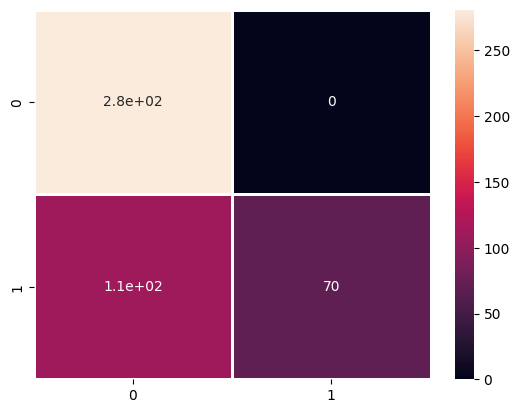

In [53]:
sns.heatmap(confusion_matrix(y_test, y_test_pred_RF), annot = True, linewidths = 1)

In [54]:
print(
    f"Classification report for classifier Random Forest:\n"
    f"{classification_report(y_test, y_test_pred_RF)}\n"
)

Classification report for classifier Random Forest:
              precision    recall  f1-score   support

         0.0       0.72      1.00      0.84       281
         1.0       1.00      0.39      0.56       180

    accuracy                           0.76       461
   macro avg       0.86      0.69      0.70       461
weighted avg       0.83      0.76      0.73       461




## Ada Boost Model

In [68]:
AdaBoostModel = AdaBoost(X_train, y_train, num_stump=10)
AdaBoostModel.fit()

c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:373: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X)
c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:374: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y)
c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:519: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred = torch.tensor(stump.predict(self.X))


In [63]:
list_feature = spambase_data_df.columns[:-1].tolist()
# convert to string
list_feature = [str(i) for i in list_feature]

In [70]:
for i in range(10):
    AdaBoostModel.stump_list[i].print_tree(AdaBoostModel.stump_list[i].root, list_feature= list_feature)

         ┌0.0
 52, 0.05┤
         └1.0
        ┌0.0
 51, 0.0┤
        └1.0
         ┌0.0
 54, 3.38┤
         └0.0
         ┌0.0
 54, 3.38┤
         └0.0
         ┌0.0
 54, 3.38┤
         └1.0
        ┌0.0
 26, 0.0┤
        └0.0
        ┌1.0
 26, 0.0┤
        └0.0
        ┌1.0
 26, 0.0┤
        └0.0
        ┌1.0
 26, 0.0┤
        └0.0
        ┌1.0
 26, 0.0┤
        └0.0


In [69]:
y_val_pred_Ada = AdaBoostModel.predict(X_val)
print(f"Accuracy to predict validation set: {accuracy_score(y_val, y_val_pred_Ada) * 100}%")

Accuracy to predict validation set: 72.93478260869564%


c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:542: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X)


In [71]:
y_test_pred_Ada = AdaBoostModel.predict(X_test)

c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:542: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X)


<AxesSubplot:>

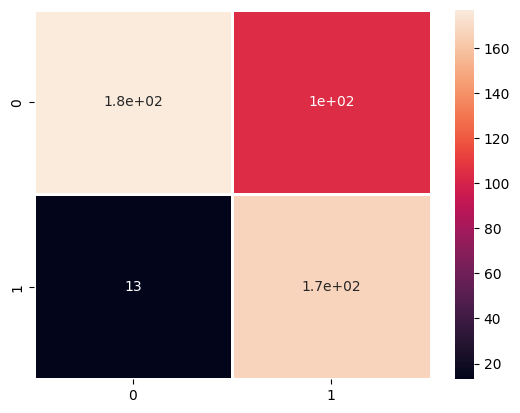

In [72]:
sns.heatmap(confusion_matrix(y_test, y_test_pred_Ada), annot = True, linewidths = 1)

In [73]:
print(
    f"Classification report for classifier AdaBoost:\n"
    f"{classification_report(y_test, y_test_pred_Ada)}\n"
)

Classification report for classifier AdaBoost:
              precision    recall  f1-score   support

         0.0       0.93      0.63      0.75       281
         1.0       0.62      0.93      0.74       180

    accuracy                           0.75       461
   macro avg       0.77      0.78      0.75       461
weighted avg       0.81      0.75      0.75       461




## XGBoost Model

In [74]:
XGBoostModel = XGBoost()
XGBoostModel.fit(X_train, y_train, learning_rate=0.01, max_depth=5, n_estimators=20, min_sample=2, gamma=0, lambda_=1)

c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:637: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X)
c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:638: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y)


In [75]:
for i in range(2):
    XGBoostModel.trees[i].print_tree(XGBoostModel.trees[i].root, list_feature=list_feature)

                                                   ┌-3.4279041290283203
                                          ┌54, 7.42┤
                                          |        └-1.0744514465332031
                                  ┌23, 0.0┤
                                  |       |        ┌-2.019266128540039
                                  |       └54, 3.16┤
                                  |                └0.8877973556518555
                         ┌15, 0.02┤
                         |        |                ┌-1.7624939680099487
                         |        |       ┌54, 2.18┤
                         |        |       |        └-0.36867469549179077
                         |        └36, 0.0┤
                         |                |        ┌-2.9176063537597656
                         |                └22, 0.25┤
                         |                         └0.507489025592804
                ┌51, 0.49┤
                |        |                         ┌-2.992470026

In [76]:
y_val_pred_XG = XGBoostModel.predict(X_val)
print(f"Accuracy to predict validation set: {accuracy_score(y_val, y_val_pred_XG) * 100}%")

Accuracy to predict validation set: 63.47826086956522%


In [77]:
y_test_pred_XG = XGBoostModel.predict(X_test)

<AxesSubplot:>

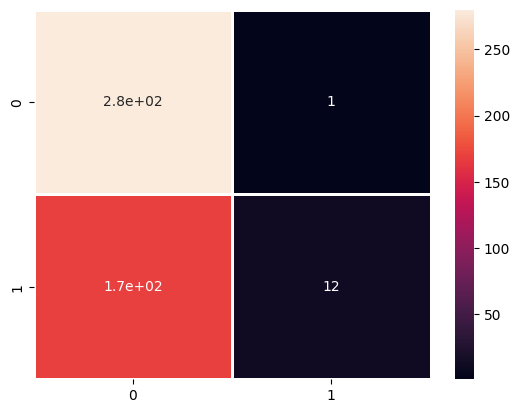

In [78]:
sns.heatmap(confusion_matrix(y_test, y_test_pred_XG), annot = True, linewidths = 1)

In [79]:
print(
    f"Classification report for classifier XGBoost:\n"
    f"{classification_report(y_test, y_test_pred_XG)}\n"
)

Classification report for classifier XGBoost:
              precision    recall  f1-score   support

         0.0       0.62      1.00      0.77       281
         1.0       0.92      0.07      0.12       180

    accuracy                           0.63       461
   macro avg       0.77      0.53      0.45       461
weighted avg       0.74      0.63      0.52       461




## Naive Bayes Model

In [5]:
def train_test_split(x, y, test_size = 0.25, random_state = None):

	""" partioning the data into train and test sets """

	x_test = x.sample(frac = test_size, random_state = random_state)
	y_test = y[x_test.index]

	x_train = x.drop(x_test.index)
	y_train = y.drop(y_test.index)

	return x_train, x_test, y_train, y_test

In [6]:
def pre_processing(df):

	""" partioning data into features and target """

	X = df.drop([df.columns[-1]], axis = 1)
	y = df[df.columns[-1]]

	return X, y

In [7]:
X_Bayes, y_Bayes = pre_processing(spambase_data_df)
X_train_Bayes, X_test_Bayes, y_train_Bayes, y_test_Bayes = train_test_split(X_Bayes, y_Bayes, test_size=0.1, random_state=42)

In [8]:
BayesModel = NaiveBayesClassifier('Gaussian')
BayesModel.fit(X_train_Bayes, y_train_Bayes)

In [9]:
y_test_pred_Bayes = BayesModel.predict(X_test_Bayes)

<AxesSubplot:>

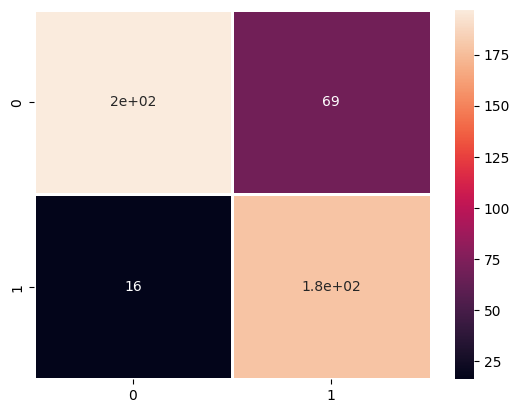

In [10]:
sns.heatmap(confusion_matrix(y_test_Bayes, y_test_pred_Bayes), annot = True, linewidths = 1)

In [11]:
print(
    f"Classification report for classifier Naive Bayes Classifier:\n"
    f"{classification_report(y_test_Bayes, y_test_pred_Bayes)}\n"
)

Classification report for classifier Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       266
           1       0.72      0.92      0.81       194

    accuracy                           0.82       460
   macro avg       0.82      0.83      0.81       460
weighted avg       0.84      0.82      0.82       460




## Genetic Algorithm

In [12]:
# add bias to X_train, X_val, X_test
X_train_GA = torch.cat((X_train, torch.ones(X_train.shape[0], 1)), dim=1)
X_val_GA = torch.cat((X_val, torch.ones(X_val.shape[0], 1)), dim=1)
X_test_GA = torch.cat((X_test, torch.ones(X_test.shape[0], 1)), dim=1)

In [13]:
def sigmoid(z):
    return 1 / (1 + torch.exp(-z))

def compute_loss_classification(individual, X, y):
    y_hat = sigmoid(X @ individual)
    y_hat = torch.clip(y_hat, 1e-7, 1 - 1e-7)
    return torch.mean( y * torch.log(y_hat) + (1 - y) * torch.log(1 - y_hat) )

In [20]:
GAModel = GeneticAlgorithm(X_train_GA, y_train, individual_size=X_train_GA.shape[1], population_size=700, fitness_function=compute_loss_classification, bounds=20, mutation_rate=0.1, crossover_rate=0.9, elitism=2)
history = GAModel.fit(1000)
best_population = GAModel.get_best_individual()
best_population

Generation:  10 Best fitness:  tensor([ 4.5756, -9.7227,  8.8074, -2.7431,  4.2802,  0.7829, -7.6639, -9.9946,
        -3.8370, -8.5309, -3.8316,  1.8365,  4.5228, -6.4830,  6.1832, -9.5047,
         1.2041,  7.5239,  3.8844,  7.8753, -9.9317, -5.6045,  2.1999,  5.7569,
         8.4608,  8.1694,  6.4296,  8.7102,  3.5143, -7.1189,  0.2553,  2.6633,
         5.2571, -1.6328,  6.9113,  8.9220,  7.5042, -1.6283,  0.1428,  6.6554,
         2.9836,  7.1699,  3.9237, -0.6749, -0.5324, -2.4925, -6.1890,  0.1779,
         4.7291, -0.2832,  6.4204]) with fitness:  tensor(-0.0998)
Generation:  20 Best fitness:  tensor([ 4.5756,  3.2397,  0.2351, -2.7431,  8.5508,  2.1685, -7.6639, -8.8752,
        -3.8370,  1.9660, -3.8316,  7.9438,  9.0433, -3.2245,  6.1832, -9.5047,
        -8.4655, -6.3134,  3.8844,  9.3899, -9.9317, -5.6045,  2.1999, -9.0269,
         8.7312,  8.1694, -6.9246,  8.7102,  3.5143, -7.1189,  6.4265,  2.6633,
         6.1340,  6.3835, -8.3773, -3.1299,  9.0701, -1.6283,  0.1428, 

tensor([ 5.5552,  5.0026,  2.7068, -7.1947, -7.2021, -3.4387, -8.4538, -6.9772,
        -6.8682, -5.4492, -7.9925,  9.6639,  4.4687, -1.2683, -6.7747, -9.5047,
        -8.4655, -8.0456,  2.8830, -3.5970, -7.2371, -5.6045, -8.1529, -9.9962,
         6.8294,  7.7436,  9.9405,  4.4287,  6.9659,  6.4881,  1.5854,  6.0086,
         3.2825,  3.7953, -3.8959,  3.8200,  6.3417,  8.9788,  7.1329,  9.8562,
         8.9884,  8.8030,  5.1720,  3.1078,  4.3414, -9.6554, -8.7970,  8.7961,
         9.8989, -0.2832,  8.8104])

In [21]:
y_val_pred_GA = sigmoid(X_val_GA @ best_population) > 0.5
print(f"Accuracy to predict validation set: {accuracy_score(y_val, y_val_pred_GA) * 100}%")

Accuracy to predict validation set: 23.47826086956522%


In [22]:
y_test_pred_GA = torch.round(sigmoid(X_test_GA @ best_population))

<AxesSubplot:>

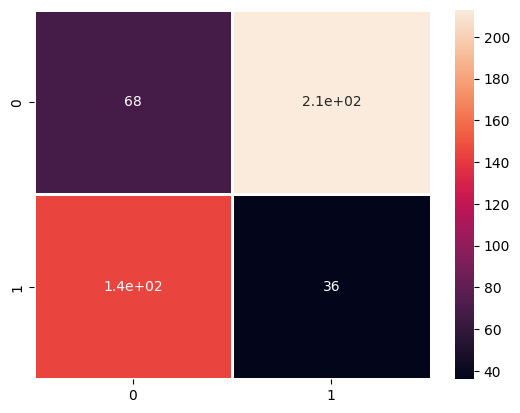

In [23]:
sns.heatmap(confusion_matrix(y_test, y_test_pred_GA), annot = True, linewidths = 1)

In [24]:
print(
    f"Classification report for classifier Genetic Algorithm:\n"
    f"{classification_report(y_test, y_test_pred_GA)}\n"
)

Classification report for classifier Genetic Algorithm:
              precision    recall  f1-score   support

         0.0       0.32      0.24      0.28       281
         1.0       0.14      0.20      0.17       180

    accuracy                           0.23       461
   macro avg       0.23      0.22      0.22       461
weighted avg       0.25      0.23      0.23       461




## Ensemble Learning

In [5]:
KNN_Model = KNN(X_train=X_train, y_train=y_train, k=7)

In [6]:
XGBoostModel = XGBoost()
XGBoostModel.fit(X_train, y_train, learning_rate=0.01, max_depth=5, n_estimators=20, min_sample=2, gamma=0, lambda_=1)

c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:637: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X)
c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:638: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y)


In [7]:
# add bias to X_train, X_val, X_test
X_train_LR = torch.cat((X_train, torch.ones(X_train.shape[0], 1)), dim=1)
X_val_LR = torch.cat((X_val, torch.ones(X_val.shape[0], 1)), dim=1)
X_test_LR = torch.cat((X_test, torch.ones(X_test.shape[0], 1)), dim=1)

batch_size = 32
learning_rate = 0.001
n_features = X_train_LR.shape[1]
n_iters = 900
LRModel = LogisticRegression(batch_size, n_features, type="binary")
history = LRModel.fit(X_train_LR, y_train, X_val_LR, y_val, n_iters, learning_rate)

  0%|          | 0/900 [00:00<?, ?it/s]

Epoch: 10, loss: 6.734971523284912, acc: 0.39472049474716187, loss_val: 7.260122299194336, acc_val: 0.39239129424095154
Epoch: 20, loss: 6.6699113845825195, acc: 0.4189440906047821, loss_val: 6.8100666999816895, acc_val: 0.41956523060798645
Epoch: 30, loss: 6.638886451721191, acc: 0.42670807242393494, loss_val: 6.6225738525390625, acc_val: 0.43043479323387146
Epoch: 40, loss: 6.617392539978027, acc: 0.4301242232322693, loss_val: 6.497291564941406, acc_val: 0.43586957454681396
Epoch: 50, loss: 5.262553691864014, acc: 0.6167702078819275, loss_val: 2.537872791290283, acc_val: 0.6195651888847351
Epoch: 60, loss: 6.599859714508057, acc: 0.4378882050514221, loss_val: 6.342304229736328, acc_val: 0.44456520676612854
Epoch: 70, loss: 6.588700771331787, acc: 0.44316771626472473, loss_val: 6.268041610717773, acc_val: 0.446739137172699
Epoch: 80, loss: 6.56735372543335, acc: 0.4465838372707367, loss_val: 6.1593546867370605, acc_val: 0.45108696818351746
Epoch: 90, loss: 6.555262565612793, acc: 0.45

In [8]:
RandomForestModel = RandomForest(n_trees=10, min_sample=2, max_depth=10, impurity_function="gini")
RandomForestModel.fit(X_train, y_train)

c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:373: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X)
c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:374: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y)


In [9]:
y_test_pred_KNN = []
for item in X_test:
      predict = KNN_Model.fit_predict(item)
      y_test_pred_KNN.append(predict)
y_test_pred_KNN = torch.tensor(y_test_pred_KNN)

y_test_pred_XG = XGBoostModel.predict(X_test)
y_test_pred_LR = torch.round(LRModel.predict(X_test_LR))
y_test_pred_RF = RandomForestModel.predict(X_test)

c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  point1 = torch.tensor(point1, dtype=torch.float32).reshape((1, len(point2[0])))
c:\Users\Tran Nguyen Nhut Duy\Desktop\Machine-Learning-From-Scratch\model.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  point2 = torch.tensor(point2, dtype=torch.float32)


In [10]:
y_pred = []
for i in range(len(y_test_pred_KNN)):
    y_Counter = Counter([y_test_pred_KNN[i].item(), y_test_pred_XG[i].item(), y_test_pred_LR[i].item(), y_test_pred_RF[i].item()])
    y_pred.append(y_Counter.most_common(1)[0][0])

In [11]:
print(f"Accuracy to predict test set with KNN: {accuracy_score(y_test, y_test_pred_KNN) * 100}%")
print(f"Accuracy to predict test set with XGBoost: {accuracy_score(y_test, y_test_pred_XG) * 100}%")
print(f"Accuracy to predict test set with Logistic Regression: {accuracy_score(y_test, y_test_pred_LR) * 100}%")
print(f"Accuracy to predict test set with Random Forest: {accuracy_score(y_test, y_test_pred_RF) * 100}%")
print(f"Accuracy to predict test set with Ensemble Learning: {accuracy_score(y_test, y_pred) * 100}%")

Accuracy to predict test set with KNN: 83.29718004338395%
Accuracy to predict test set with XGBoost: 63.34056399132321%
Accuracy to predict test set with Logistic Regression: 77.00650759219089%
Accuracy to predict test set with Random Forest: 76.57266811279827%
Accuracy to predict test set with Ensemble Learning: 84.59869848156181%


<AxesSubplot:>

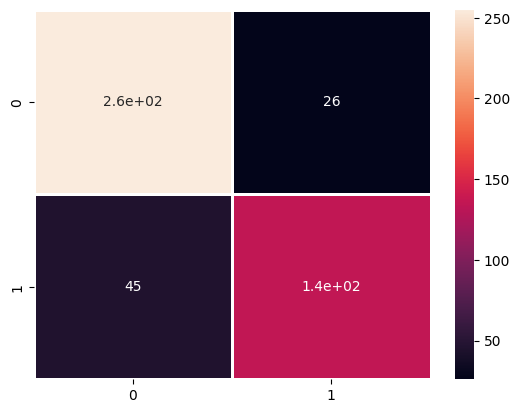

In [12]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, linewidths = 1)

In [13]:
print(
    f"Classification report for classifier XGBoost:\n"
    f"{classification_report(y_test, y_pred)}\n"
)

Classification report for classifier XGBoost:
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88       281
         1.0       0.84      0.75      0.79       180

    accuracy                           0.85       461
   macro avg       0.84      0.83      0.83       461
weighted avg       0.85      0.85      0.84       461


